https://blog.keras.io/building-autoencoders-in-keras.html

Autoencoders are neural networks used for datacompression, image denoising, and dimensionality reduction.

"Autoencoding" is a data compression algorithm where the compression and decompression functions are 1) data-specific, 2) lossy, and 3) learned automatically from examples rather than engineered by a human. Additionally, in almost all contexts where the term "autoencoder" is used, the compression and decompression functions are implemented with neural networks.

To build an autoencoder, you need three things: <br>
<b>an encoding function</b>, <br>
<b>a decoding function</b>,<br>
and a distance function between the amount of information loss between the compressed representation of your data and the decompressed representation (<b>i.e. a "loss" function</b>). 

The encoder and decoder will be chosen to be parametric functions (typically neural networks), and to be differentiable with respect to the distance function, so the parameters of the encoding/decoding functions can be optimize to minimize the reconstruction loss, using Stochastic Gradient Descent. 


Today two interesting practical applications of autoencoders are <b>data denoising , and dimensionality reduction for data visualization</b>. With appropriate dimensionality and sparsity constraints, autoencoders can learn data projections that are more interesting than PCA or other basic techniques.

### Auto encoder using Keras

In [27]:
from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 32

input_img = Input(shape=(784,))

### Encoder
encoded = Dense(encoding_dim, activation='relu')(input_img)

## Decoder
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [28]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [33]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [35]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [36]:
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.3719 - val_loss: 0.2713
Epoch 2/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.2638 - val_loss: 0.2527
Epoch 3/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.2426 - val_loss: 0.2305
Epoch 4/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.2233 - val_loss: 0.2141
Epoch 5/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.2096 - val_loss: 0.2026
Epoch 6/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.1994 - val_loss: 0.1935
Epoch 7/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.1908 - val_loss: 0.1857
Epoch 8/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.1838 - val_loss: 0.1793
Epoch 9/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.1778 - val_loss: 0.1737
Epoch

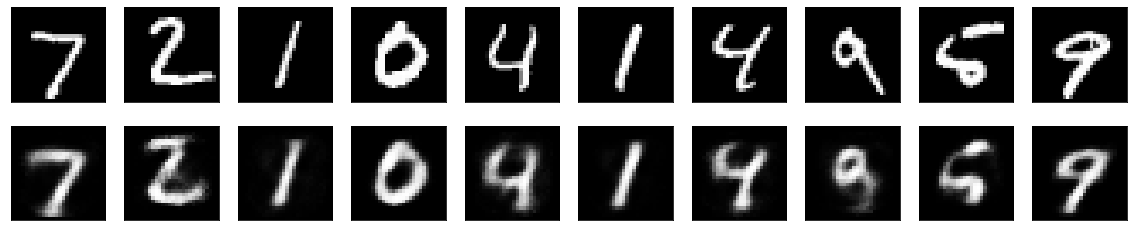

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 4))
for i in range(10):
    ax = plt.subplot(2, 10, i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, 10, i+10+1)
    plt.imshow(autoencoder.predict(x_test)[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

### Auto encoders using pytorch 

In [96]:
import torch 
from torchvision import transforms, datasets

In [97]:
transform = transforms.ToTensor()

train_set = datasets.MNIST(root='./data', train=True, transform=transform)
test_set = datasets.MNIST(root='./data', train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=20)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=20)

#### Visualize the data

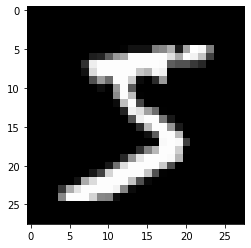

In [98]:
data = iter(train_loader)
images, labels = data.next()

# get one image
img = images[0].squeeze()
plt.imshow(img, cmap='gray');

#### Neural Network Architecture

In [99]:
import torch.nn as nn
import torch.nn.functional as F

class AutoEncoder(nn.Module):
    def __init__(self, encoding_dim):
        super(AutoEncoder, self).__init__()
        
        self.fc1 = nn.Linear(784, encoding_dim)
        
        self.fc2 = nn.Linear(encoding_dim, 784)
        
    def forward(self, x):
        
        x = F.relu(self.fc1(x))
        
        x  = F.sigmoid(self.fc2(x))
        
        return x

In [100]:
encoding_dim = 32
model = AutoEncoder(encoding_dim)
model

AutoEncoder(
  (fc1): Linear(in_features=784, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=784, bias=True)
)

#### Training the neural network

In [112]:
criterion = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [113]:
epochs = 20

for e in range(epochs):
    training_loss = 0
    
    for images, _ in train_loader:
        optimizer.zero_grad()
        
        images = images.view(images.size(0), -1)
        output = model(images)
        loss = criterion(output, images)
        loss.backward()
        optimizer.step()
        training_loss += loss * images.size(0)
    print("Epoch {} \t Training loss is {}".format(e+1, training_loss / len(train_loader)))

Epoch 1 	 Training loss is 0.5068274140357971
Epoch 2 	 Training loss is 0.27472299337387085
Epoch 3 	 Training loss is 0.24592803418636322
Epoch 4 	 Training loss is 0.2389899343252182
Epoch 5 	 Training loss is 0.23562778532505035
Epoch 6 	 Training loss is 0.2336668074131012
Epoch 7 	 Training loss is 0.23241056501865387
Epoch 8 	 Training loss is 0.2315157651901245
Epoch 9 	 Training loss is 0.23081091046333313
Epoch 10 	 Training loss is 0.23021665215492249
Epoch 11 	 Training loss is 0.2296927273273468
Epoch 12 	 Training loss is 0.22922733426094055
Epoch 13 	 Training loss is 0.2287897765636444
Epoch 14 	 Training loss is 0.2283838838338852
Epoch 15 	 Training loss is 0.2280048429965973
Epoch 16 	 Training loss is 0.22764404118061066
Epoch 17 	 Training loss is 0.2273043692111969
Epoch 18 	 Training loss is 0.22698134183883667
Epoch 19 	 Training loss is 0.22667767107486725
Epoch 20 	 Training loss is 0.2263830602169037


#### check the model results

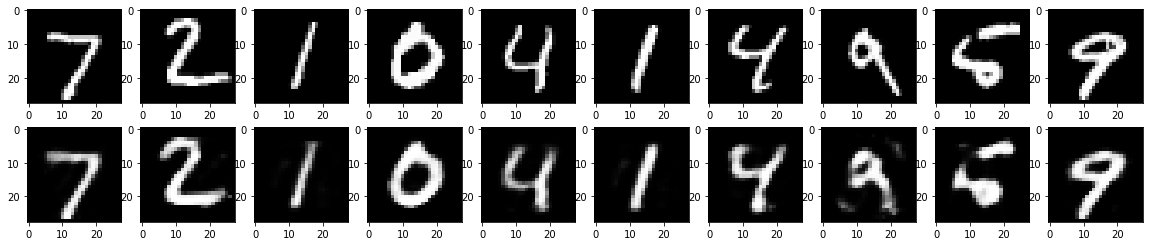

In [114]:
data = iter(test_loader)
images, labels = data.next()

# flatten images 
images_flatten = images.view(images.size(0), -1)
output = model(images_flatten)

output = output.view(20, 1, 28, 28)
output = output.detach().numpy()

plt.figure(figsize=(20, 4))
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.subplot(2, 10, i+10+1)
    plt.imshow(output[i].squeeze(), cmap='gray')